In [14]:
%load_ext autoreload
%autoreload 2
from data.visualizations import create_2Dimagegrid
import numpy as np
from server_specific.server_utils import get_patients
from data.preprocessing import clip_scans, min_max_normalization, center_image, resample_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
patients = get_patients()
patient_x = patients[0]
original_voxel_spacing_x = patient_x.get_voxel_spacings()
print(original_voxel_spacing_x)

(np.float32(0.33007812), np.float32(0.33007812), np.float32(0.5))


Now let's get a slice of data in there

In [6]:
z_slice = 80

images = []
titles = []

image, mask = patient_x.get_image_mask_tuple()
ccta_scan_slice = image[:, :, z_slice]
mask_slice = mask[:, :, z_slice]

images.extend([ccta_scan_slice, mask_slice])
titles.extend(["original_ccta_scan", "mask"])

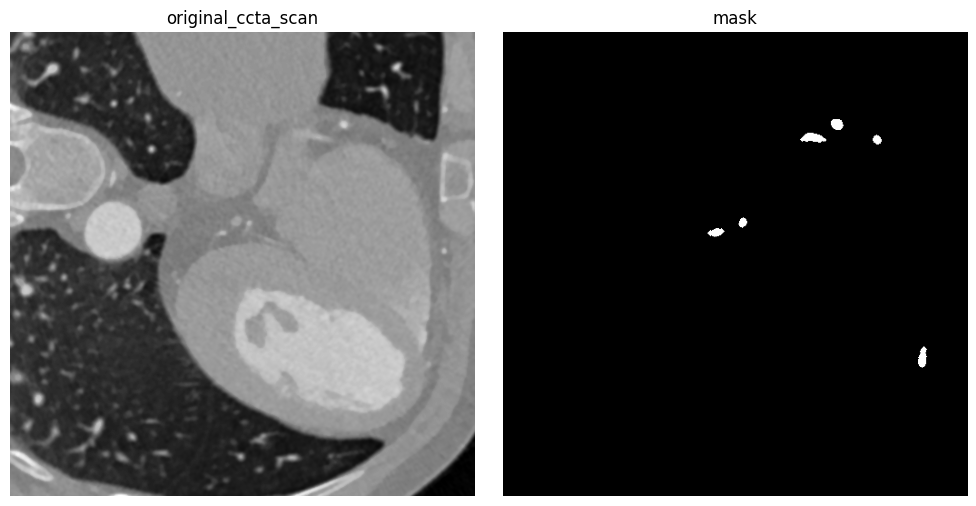

In [7]:
create_2Dimagegrid(images, titles, max_cols = 2)

First step of preprocessing, clipping

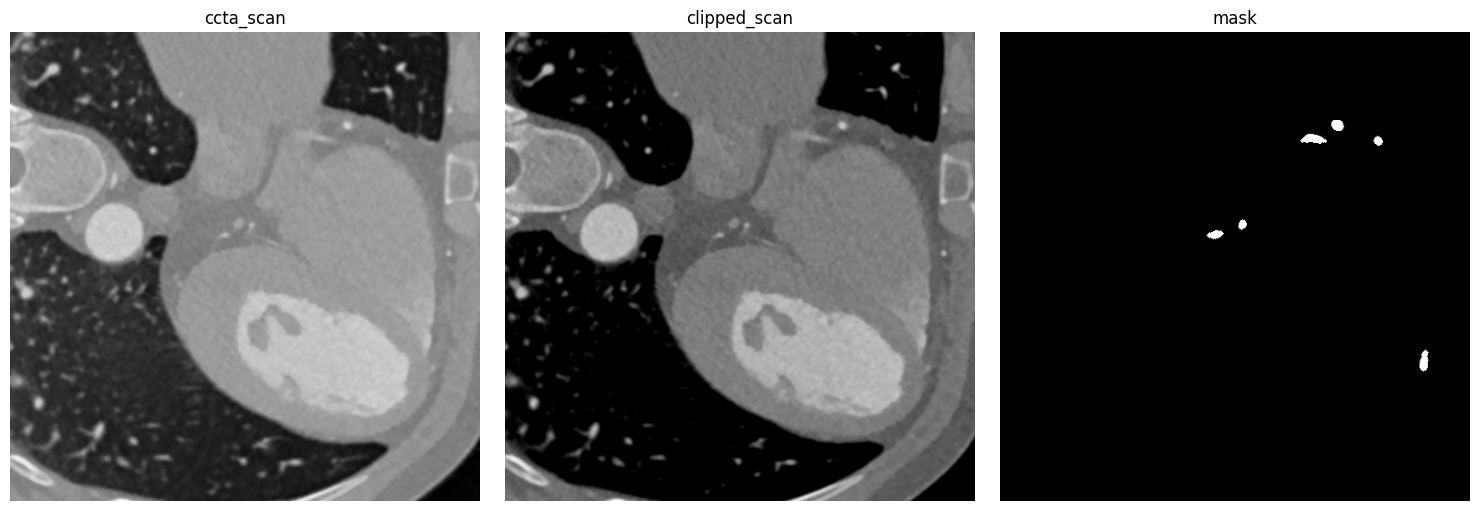

In [9]:
image, mask = patient_x.get_image_mask_tuple()

# clip the image
min_value = -600
max_value = 1000
clipped_image = clip_scans(image.copy(), min_value, max_value)

ccta_scan_slice = image[:, :, z_slice]
clipped_image_slice = clipped_image[:, :, z_slice]
mask_slice = mask[:, :, z_slice]

images = [ccta_scan_slice, clipped_image_slice, mask_slice]
titles = ["ccta_scan", "clipped_scan", "mask"]

create_2Dimagegrid(images, titles, max_cols = 4)

second step: min_max_normalization

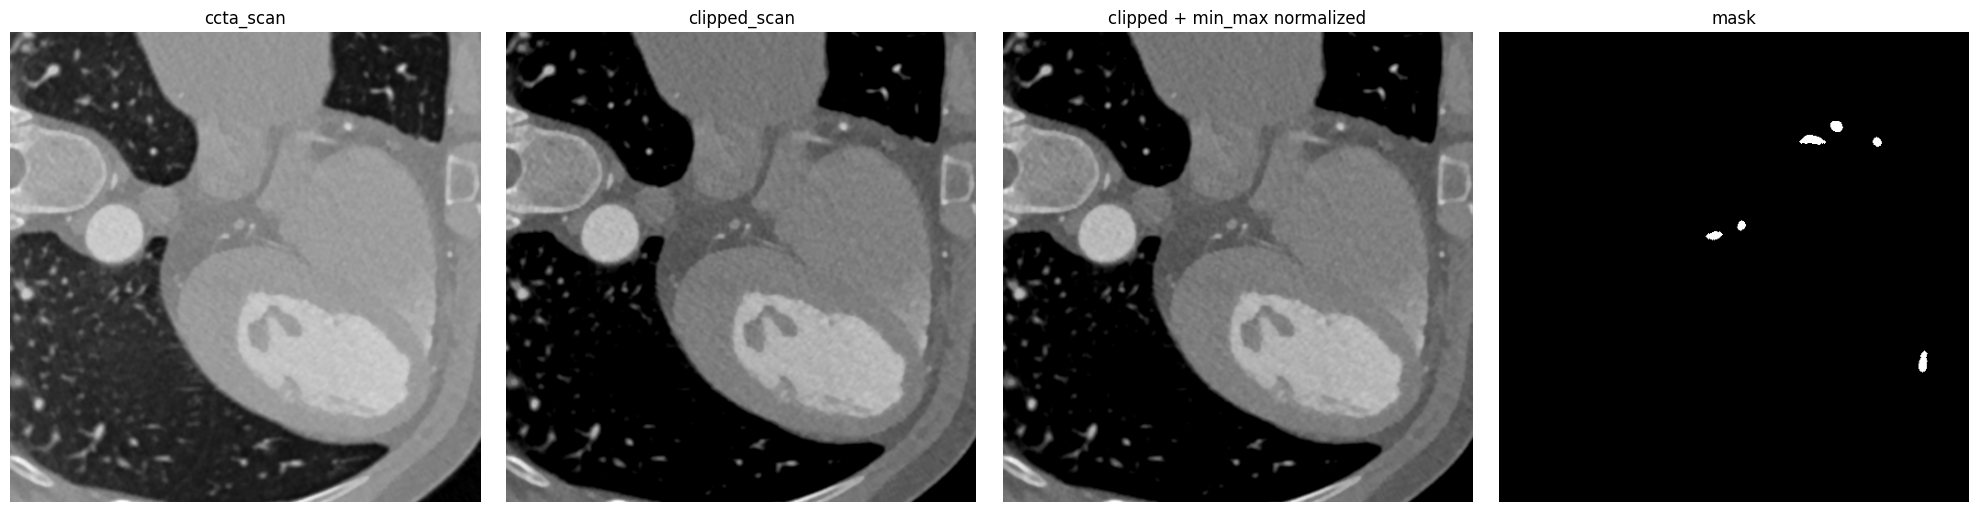

In [10]:
image, mask = patient_x.get_image_mask_tuple()

# clip the image
min_value = -600
max_value = 1000
clipped_image = clip_scans(image.copy(), min_value, max_value)
normalized_clipped = min_max_normalization(clipped_image.copy(), min_value, max_value)

ccta_scan_slice = image[:, :, z_slice]
clipped_image_slice = clipped_image[:, :, z_slice]
normalized_clipped_slice = normalized_clipped[:, :, z_slice]
mask_slice = mask[:, :, z_slice]

images = [ccta_scan_slice, clipped_image_slice, normalized_clipped_slice, mask_slice]
titles = ["ccta_scan", "clipped_scan", "clipped + min_max normalized", "mask"]

create_2Dimagegrid(images, titles, max_cols = 4)

Third step: centering

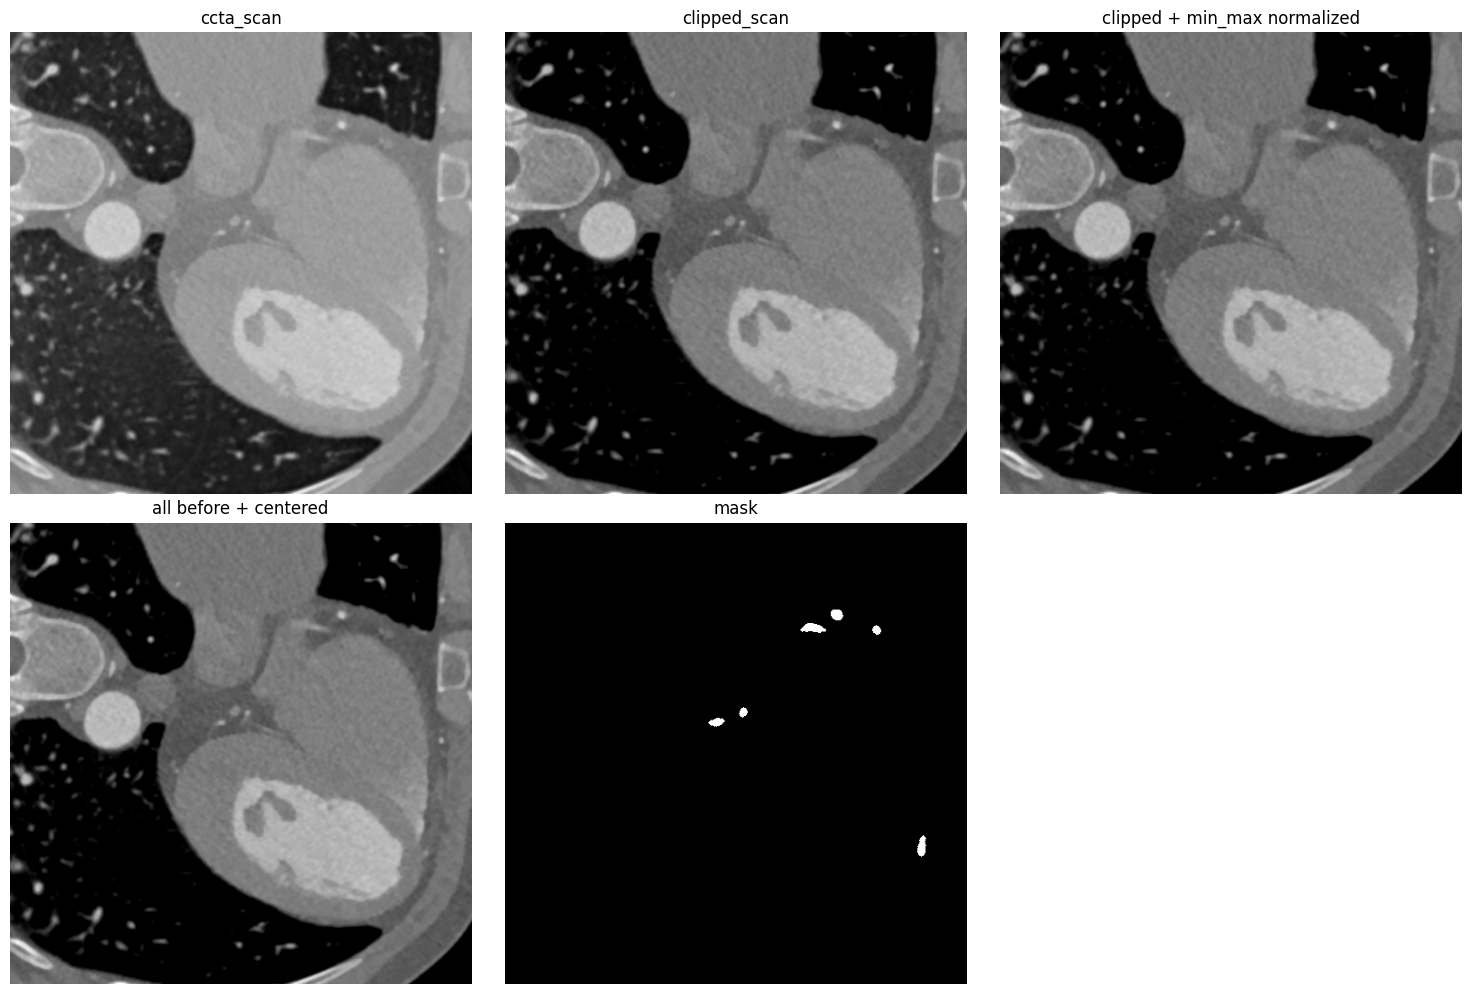

In [12]:
image, mask = patient_x.get_image_mask_tuple()

# clip the image
min_value = -600
max_value = 1000
clipped_image = clip_scans(image.copy(), min_value, max_value)
normalized_clipped = min_max_normalization(clipped_image.copy(), min_value, max_value)
centered = center_image(normalized_clipped.copy())

ccta_scan_slice = image[:, :, z_slice]
clipped_image_slice = clipped_image[:, :, z_slice]
normalized_clipped_slice = normalized_clipped[:, :, z_slice]
centered_slice = centered[:, :, z_slice]
mask_slice = mask[:, :, z_slice]

images = [ccta_scan_slice, clipped_image_slice, normalized_clipped_slice, centered_slice, mask_slice]
titles = ["ccta_scan", "clipped_scan", "clipped + min_max normalized", "all before + centered", "mask"]

create_2Dimagegrid(images, titles, max_cols = 3)

Fourth Step: Fix the voxel spacings

original shape: (512, 512, 275), after fixing voxel spacings: (563, 563, 458), mask after fixing: (563, 563, 458)


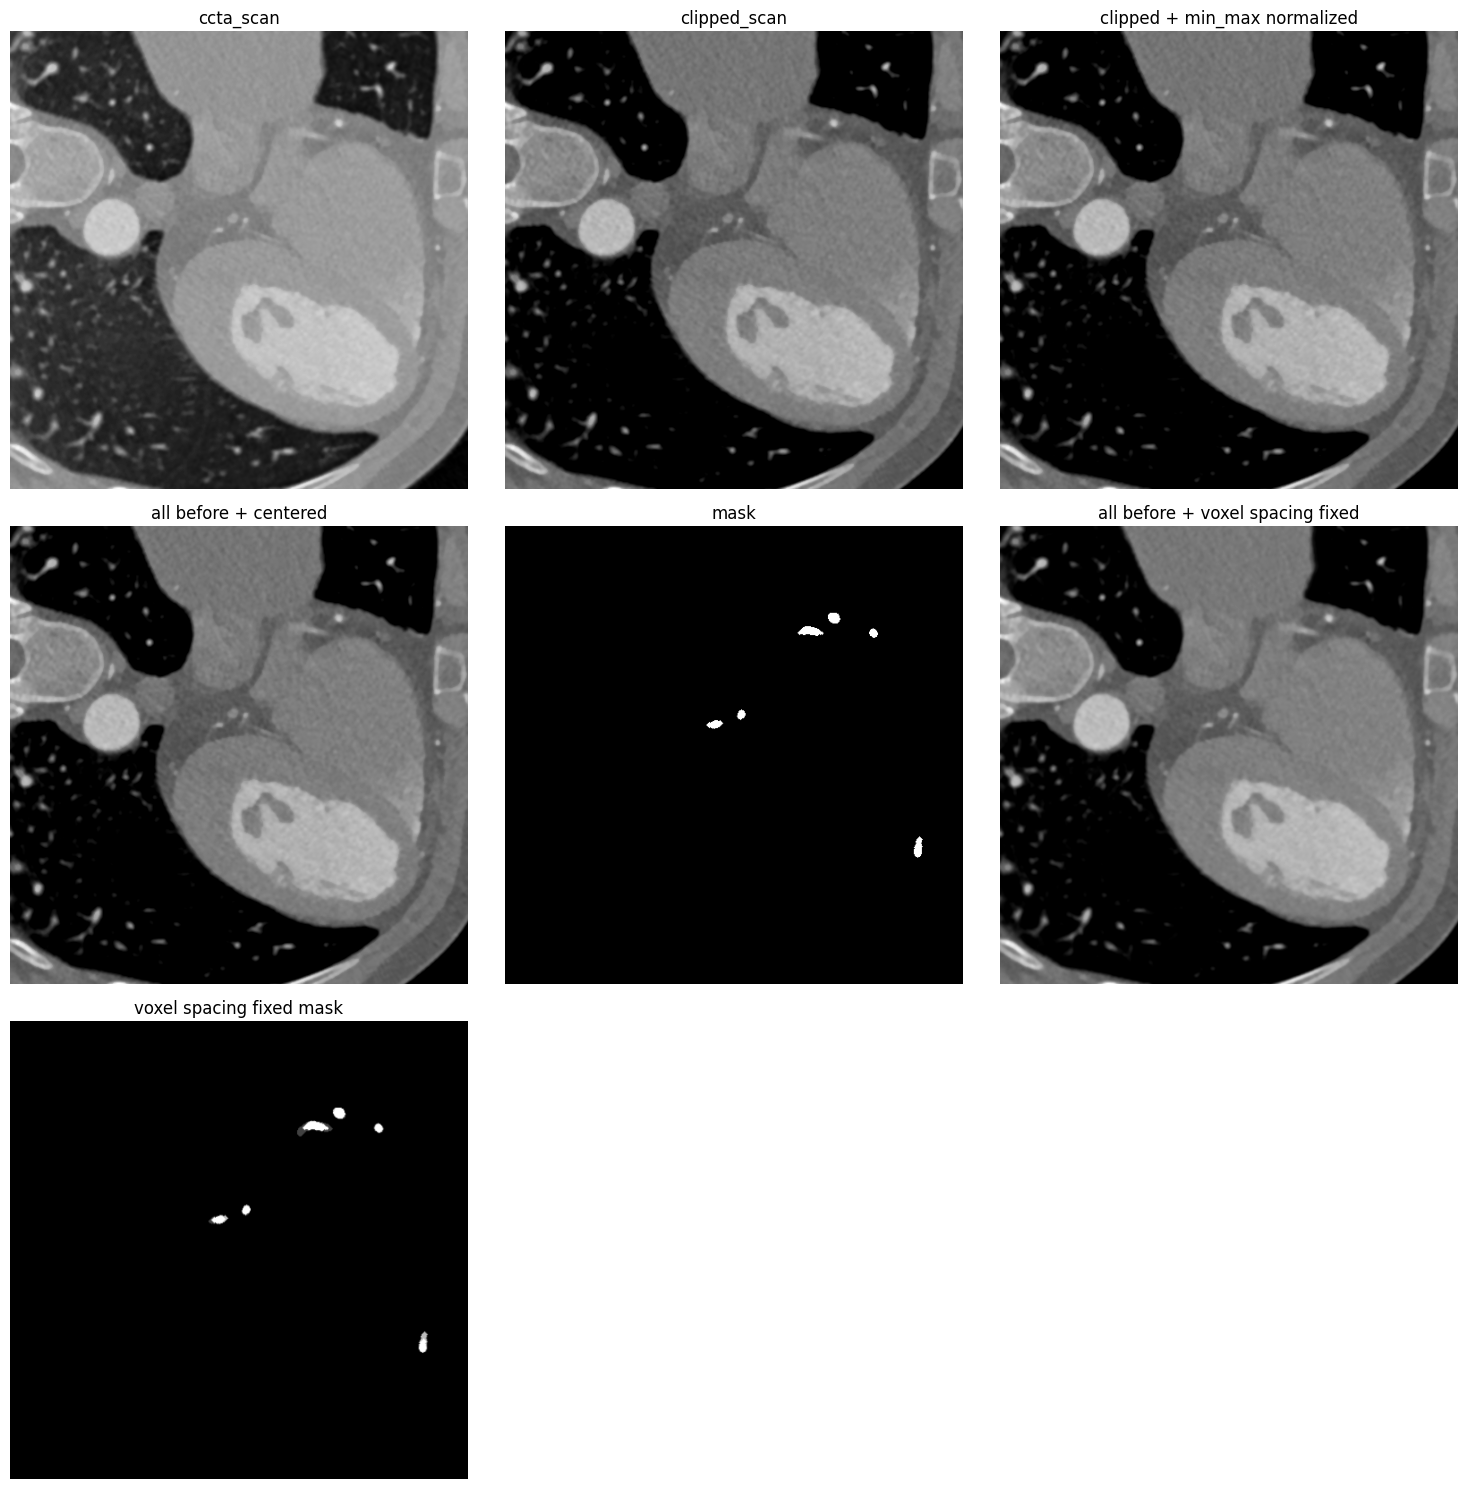

In [18]:
image, mask = patient_x.get_image_mask_tuple()

target_voxel_spacing = [0.3, 0.3, 0.3]

# clip the image
min_value = -600
max_value = 1000
clipped_image = clip_scans(image.copy(), min_value, max_value)
normalized_clipped = min_max_normalization(clipped_image.copy(), min_value, max_value)
voxel_spacing_image = resample_image(normalized_clipped.copy(), original_voxel_spacing_x, target_voxel_spacing)
voxel_spacing_mask = resample_image(mask.copy(), original_voxel_spacing_x, target_voxel_spacing)

print(f"original shape: {image.shape}, after fixing voxel spacings: {voxel_spacing_image.shape}, mask after fixing: {voxel_spacing_mask.shape}")

centered = center_image(normalized_clipped.copy())

ccta_scan_slice = image[:, :, z_slice]
clipped_image_slice = clipped_image[:, :, z_slice]
normalized_clipped_slice = normalized_clipped[:, :, z_slice]
centered_slice = centered[:, :, z_slice]
voxel_spacing_slice_zdim = int(z_slice * 0.5/0.3)
voxel_spacing_image_slice = voxel_spacing_image[:, :, voxel_spacing_slice_zdim]
voxel_spacing_mask_slice = voxel_spacing_mask[:, :, voxel_spacing_slice_zdim]
mask_slice = mask[:, :, z_slice]

images = [ccta_scan_slice, clipped_image_slice, normalized_clipped_slice, centered_slice, mask_slice, voxel_spacing_image_slice, voxel_spacing_mask_slice]
titles = ["ccta_scan", "clipped_scan", "clipped + min_max normalized", "all before + centered", "mask", "all before + voxel spacing fixed",  "voxel spacing fixed mask"]

create_2Dimagegrid(images, titles, max_cols = 3)